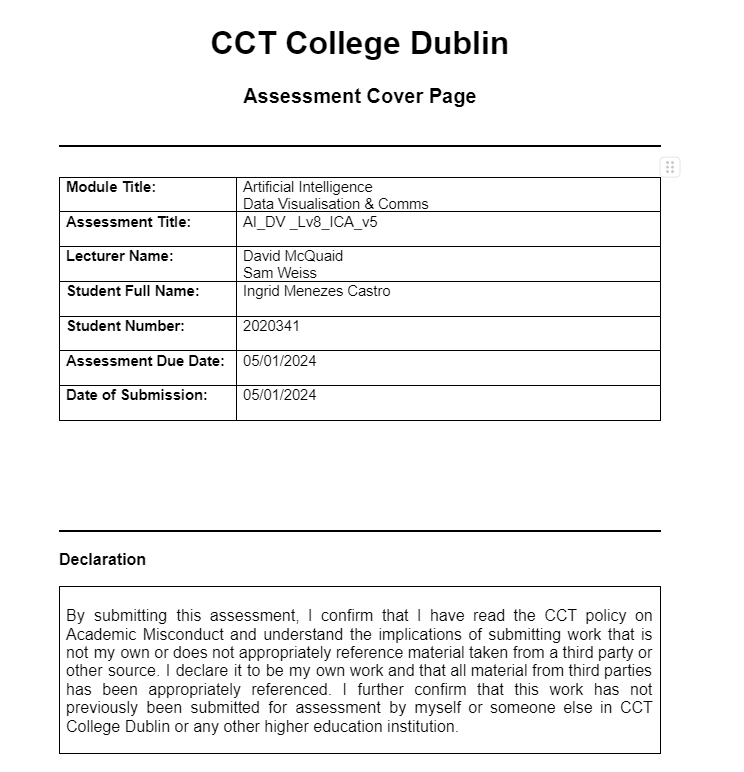

# Practical Task

Ciara is looking for employees for her new company, which develops and provides AI based logistic software for retailers. Ciara has determined that she needs:

2 Python Programmers, 2 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.
Assume that if a person has two abilities, he or she can take on two roles in the company.

So Ciara narrowed down her selections to the following people:

<table>
        <thead>
            <tr>
                <th>Name</th>
                <th>Abilities</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Peter</td>
                <td>Python and AI</td>
            </tr>
            <tr>
                <td>Juan</td>
                <td>Web and AI</td>
            </tr>
            <tr>
                <td>Jim</td>
                <td>AI and Systems</td>
            </tr>
            <tr>
                <td>Jane</td>
                <td>Python and Database</td>
            </tr>
            <tr>
                <td>Mary</td>
                <td>Web and Systems</td>
            </tr>
            <tr>
                <td>Bruce</td>
                <td>Systems and Python</td>
            </tr>
            <tr>
                <td>Anita</td>
                <td>Web and AI</td>
            </tr>
        </tbody>
    </table>

## Scenario 1:

Suppose Ciara knows Python, and only has funds to hire three more people.

## Components for Scenario 1

#### Variables:
 - Spots to be occupied: eng1, eng2, eng3 and eng4.

#### Domain:
 - Names of possible employees of the team.
 
#### Constraints:
 - Hiring constraint: This constraint creates sets for each ability and determines the minimum requirements for each ability: 2 professionals that know python, 2 for ai, 1 for web, 1 for systems and 1 for database. The hiring constraint would return 0 solutions in case those requirements weren't fulfilled. 
 - Ciara constraint: Ciara needs to be on the team, so this constraint guarantees that and leaves other 3 spots open for the employees she can hire. 

In [2]:
# Imports
from constraint import *

In [3]:
problem = Problem()

# ability and people who has them
python = ["peter", "bruce", "jane", "ciara"]
ai = ["peter", "juan", "anita", "jim"]
web = ["juan", "mary", "anita"]
database = ["jane"]
systems = ["jim", "bruce", "mary"]

# in this I've chosen to put the spots available in the team as variables and add the people who could fulfill them
# as the domain of those spots. 
problem.addVariable("eng1", ["ciara", "juan", "peter", "bruce", "jane", "anita", "jim", "mary"])
problem.addVariable("eng2", ["ciara", "juan", "peter", "bruce", "jane", "anita", "jim", "mary"])
problem.addVariable("eng3", ["ciara", "juan", "peter", "bruce", "jane", "anita", "jim", "mary"])
problem.addVariable("eng4", ["ciara", "juan", "peter", "bruce", "jane", "anita", "jim", "mary"])


# this is our main constraint, that allows solutions that fulfill the minimum requerements of each ability.
# is it possible that some abilities have more professionals than needed, but not possible to have less.
def hiring_constraint1(*args):
    python_eng = set()
    ai_eng = set()
    web_eng = set()
    database_eng = set()
    systems_eng = set()
    
    for eng in args:
        if eng in python:
            python_eng.add(eng)
        if eng in ai:
            ai_eng.add(eng)
        if eng in web:
            web_eng.add(eng)
        if eng in database:
            database_eng.add(eng)
        if eng in systems:
            systems_eng.add(eng)
    return(
        len(python_eng) >= 2
        and len(ai_eng) >= 2
        and len(web_eng) >= 1
        and len(database_eng) >= 1
        and len(systems_eng) >= 1
    )

# this constraints includes ciara in the team, as she knows python and can hire more 3 people.
def ciara_constraint(*args):
    return "ciara" in args

# adding the constraints created
problem.addConstraint(ciara_constraint)
problem.addConstraint(hiring_constraint1)

# getting solutions
solutions1 = problem.getSolutions()

## Solutions to Scenario 1

In [4]:
# solution1 has a lot of dulicates because engineers just are set in different spots all the time
# so to handle the duplicates, we will first create an empty set
engineers1 = set()

# each solution is then put in a frozenset, that creates an immutable set object from an iterable (Geeks for Geeks, 2023)
# this prevents any duplicate values in the set
for solution in solutions1:
    engineers1.add(frozenset(solution.values()))

# this makes it printable in a better format 
for engineer_group in engineers1:
    print(list(engineer_group))

# additionally the number of solutions is given
print("Total Solutions:", len(engineers1))

['ciara', 'juan', 'jane', 'jim']
['ciara', 'anita', 'jane', 'jim']
Total Solutions: 2


## Scenario 2:

Suppose Ciara and Juan become partners, with the additional funds they can now employ four more people but must employ another AI Engineer, so they need 2 Python Programmers, 3 AI Engineers, 1 Web Designer, 1 Database Admin, and 1 Systems Engineer.

## Components for Scenario 2

#### Variables:
 - Spots to be occupied: eng1, eng2, eng3, eng4, eng5 and eng6.

#### Domain:
 - Names of possible employees of the team.
 
#### Constraints:
 - Hiring constraint: This constraint creates sets for each ability and determine the minimum requirements for each ability: 2 professionals that know python, 3 for ai, 1 for web, 1 for systems and 1 for database. The hiring constraint would return 0 solutions in case those requirements weren't fulfilled. 
 - Ciara constraint: Ciara needs to be on the team, so this constraint guarantees that and leaves other 4 spots open for the employees she and Juan can hire.
 - Juan constraint: Juan also needs to be on the team, as he partnered up with Ciara, so he is countered as a member automatically, leaving 4 spots open for other employees to fulfill the minimum requerement of abilities. 

In [6]:
problem = Problem()

# ability and people who has them
python = ["peter", "bruce", "jane", "ciara"]
ai = ["peter", "juan", "anita", "jim"]
web = ["juan", "mary", "anita"]
database = ["jane"]
systems = ["jim", "bruce", "mary"]


# for this second scenario we will have 6 engineers total, including Ciara and Juan that are mandatory.
problem.addVariable("eng1", ["ciara", "juan", "peter", "bruce", "jane", "anita", "jim", "mary"])
problem.addVariable("eng2", ["ciara", "juan", "peter", "bruce", "jane", "anita", "jim", "mary"])
problem.addVariable("eng3", ["ciara", "juan", "peter", "bruce", "jane", "anita", "jim", "mary"])
problem.addVariable("eng4", ["ciara", "juan", "peter", "bruce", "jane", "anita", "jim", "mary"])
problem.addVariable("eng5", ["ciara", "juan", "peter", "bruce", "jane", "anita", "jim", "mary"])
problem.addVariable("eng6", ["ciara", "juan", "peter", "bruce", "jane", "anita", "jim", "mary"])


# the hiring_constraint2 for scenario 2 creates empty sets for every list of engineers
# and adds engineers for every group limited to the amount of 2 for python, 3 for ai, 1 for web,
# 1 for databases and 1 for systems. once all constraints are satisfied, it returns a solution.
def hiring_constraint2(*args):
    python_eng = set()
    ai_eng = set()
    web_eng = set()
    database_eng = set()
    systems_eng = set()
    
    for eng in args:
        if eng in python:
            python_eng.add(eng)
        if eng in ai:
            ai_eng.add(eng)
        if eng in web:
            web_eng.add(eng)
        if eng in database:
            database_eng.add(eng)
        if eng in systems:
            systems_eng.add(eng)
    return(
        len(python_eng) >= 2
        and len(ai_eng) >= 3
        and len(web_eng) >= 1
        and len(database_eng) >= 1
        and len(systems_eng) >= 1
    )

# this constraint guarantees ciara will be in the team
def ciara_constraint(*args):
    return "ciara" in args

# this constraint guarantees juan will be in the team
def juan_constraint(*args):
    return "juan" in args

# adding the constraints created
problem.addConstraint(ciara_constraint)
problem.addConstraint(juan_constraint)
problem.addConstraint(hiring_constraint2)

# getting solutions
solutions2 = problem.getSolutions()

## Solutions for Scenario 2

In [7]:
engineers2 = set()

for solution in solutions2:
    engineers2.add(frozenset(solution.values()))

for engineer_group in engineers2:
    print(list(engineer_group))

print("Total Solutions:", len(engineers2))

['ciara', 'bruce', 'jane', 'peter', 'juan', 'anita']
['ciara', 'mary', 'jane', 'juan', 'anita', 'jim']
['ciara', 'jane', 'peter', 'juan', 'jim']
['ciara', 'mary', 'jane', 'peter', 'juan', 'jim']
['ciara', 'bruce', 'jane', 'juan', 'anita', 'jim']
['ciara', 'jane', 'juan', 'anita', 'jim']
['ciara', 'jane', 'peter', 'juan', 'anita', 'jim']
['ciara', 'jane', 'peter', 'bruce', 'juan', 'jim']
['ciara', 'mary', 'jane', 'peter', 'juan', 'anita']
Total Solutions: 9


# Theoretical task

Discuss in detail how using Constraint Satisfaction finds an answer or finds no solution to the problems in Tasks for Artificial Intelligence part 1. How does this differ from standard algorithmic solutions?

This task is done/explained in the word doc.

# Algorithm to solve this task

For the alternative algorithm

# Visualisations

Notes: For the proper visualisation I have installed matplotlib_venn that is available on the commented line below. Overall imports on the next block.

In [ ]:
#pip install matplotlib_venn

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from matplotlib_venn import *

In [37]:
engineers = ["ciara", "peter", "juan", "jim", "jane", "mary", "bruce", "anita"]

# hired engineers from scenario 1
hired_engineers_11 = list(engineers1)[0]
hired_engineers_12 = list(engineers1)[1]

# hired engineers from scenario 2
hired_engineers_21 = list(engineers2)[0]
hired_engineers_22 = list(engineers2)[1]
hired_engineers_23 = list(engineers2)[2]
hired_engineers_24 = list(engineers2)[3]
hired_engineers_25 = list(engineers2)[4]
hired_engineers_26 = list(engineers2)[5]
hired_engineers_27 = list(engineers2)[6]
hired_engineers_28 = list(engineers2)[7]
hired_engineers_29 = list(engineers2)[8]


print(hired_engineers_23)

frozenset({'ciara', 'jane', 'peter', 'juan', 'jim'})
